In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing
from pmdarima import auto_arima
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [2]:
df_wal=pd.read_csv('df_wal.csv',index_col='Date',parse_dates=True)


In [3]:
## In time -series analysis we are just going to consider the 
## date feature and the weekly sales

## Data loading
## Date has to be parsed to perform date related analysis
time_series = pd.read_csv('df_wal.csv',
                          header=None,
                          usecols=[2,3],skiprows=1,
                          names=['Date',"Weekly_Sales"],
                          parse_dates=["Date"],
                          index_col=0)

In [4]:
time_series_grouped =  time_series.groupby('Date').mean()

In [5]:
time_series_grouped.head(2)

,Weekly_Sales
Date,
2010-02-05,16836.167844
2010-02-12,16352.097463


In [6]:
df_wal.groupby('Date').mean().head(10)

,Store,Dept,Weekly_Sales,Temperature(C),Fuel_Price($USD/L),MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Super_Bowl,LaborsDay,Thanksgiving,Christmas,Easter,IsHoliday,week,year,month,quater
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,22.038579,44.181726,16836.167844,33.277942,2.717869,7482.268334,3252.963450,1763.112496,3047.784024,4350.392463,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,2.0,1.0
2010-02-12,22.016915,44.377199,16352.097463,33.361810,2.696102,7501.079729,3260.244861,1766.095272,3055.315633,4363.990340,...,1.0,0.0,0.0,0.0,0.0,1.0,6.0,2010.0,2.0,1.0
2010-02-19,22.038965,44.305341,16216.964169,37.038310,2.673666,7481.478299,3253.519359,1762.786314,3047.466830,4344.065548,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2010.0,2.0,1.0
2010-02-26,22.041681,44.107421,14900.183209,38.629563,2.685642,7478.894826,3257.449758,1763.830898,3047.436350,4339.044753,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2010.0,2.0,1.0
2010-03-05,22.043818,44.045516,15921.438573,42.373998,2.731816,7490.279405,3255.272998,1762.437934,3050.286262,4362.055585,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2010.0,3.0,1.0
2010-03-12,22.063304,44.107312,15547.339648,46.967143,2.774452,7468.944806,3251.832529,1760.053563,3043.167095,4332.890850,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2010.0,3.0,1.0
2010-03-19,22.050968,44.063201,15286.928787,49.481019,2.816063,7484.943558,3256.639741,1762.456930,3051.836813,4349.531502,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2010.0,3.0,1.0
2010-03-26,22.097048,44.164235,14976.105701,47.979325,2.823610,7483.012936,3253.108398,1760.757058,3049.355420,4348.912974,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2010.0,3.0,1.0
2010-04-02,22.101390,44.097999,17098.756263,52.587887,2.825453,7476.085079,3251.166526,1760.829297,3045.374061,4348.554612,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,2010.0,4.0,2.0


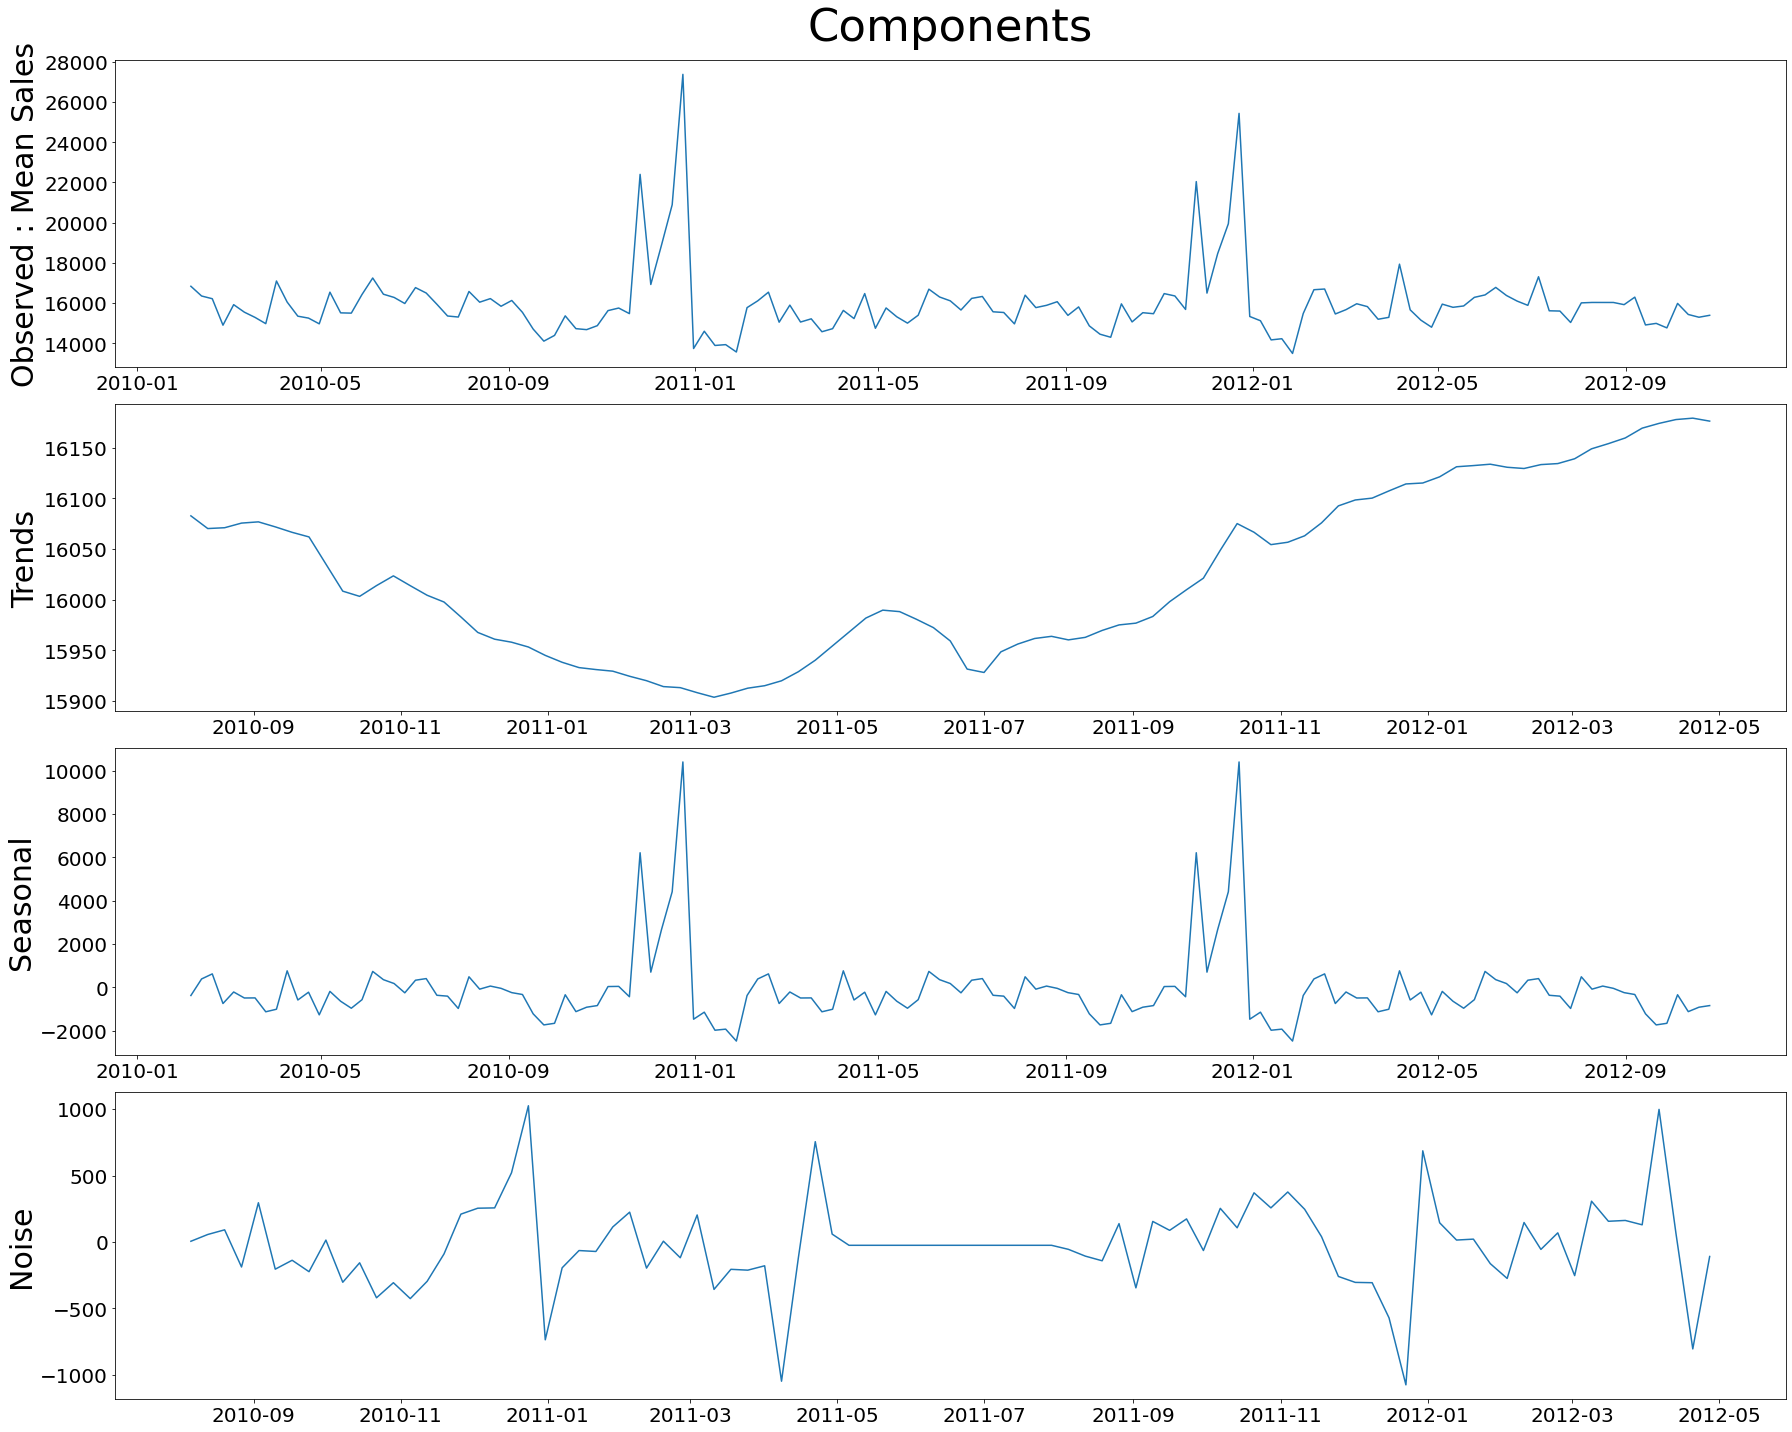

In [7]:
### Error, Trend, Seasonality Decomposition for Time Series Data
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(time_series_grouped, model='additive')

trend = decompose.trend
seasonal = decompose.seasonal
noise = decompose.resid

fig = plt.figure(figsize=(25,20))
#plt.subplots_adjust(top=0.2,wspace=0.12)

plt.subplot(411)
plt.plot(time_series_grouped)
plt.title('Components',fontdict={'fontsize':45},pad=20)
plt.ylabel('Observed : Mean Sales',fontdict={'fontsize':30})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trends',fontdict={'fontsize':30})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonal',fontdict={'fontsize':30})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(414)
plt.plot(noise)
plt.ylabel('Noise',fontdict={'fontsize':30})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

From the output above, the dataset has seasonality (repetitive cycles). Since the dataset has seasonality, we can say it is non-stationary. But still, we need to perform a statistical check using the Augmented Dickey-Fuller (ADF) test to assess stationarity in our dataset. The test is more accurate.



In [8]:
from statsmodels.tsa.stattools import ccovf,ccf
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.tools.eval_measures import mse, rmse, meanabs

# Tests for Stationarity
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a <a href='https://en.wikipedia.org/wiki/Unit_root_test'>unit root</a> hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller</a> and <a href='https://en.wikipedia.org/wiki/KPSS_test'>Kwiatkowski-Phillips-Schmidt-Shin</a> tests are stationarity tests.

## Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller Test</a>. In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is <em>not</em> stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:

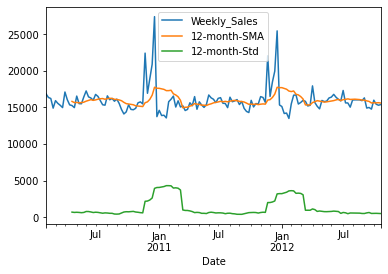

In [9]:
time_series_grouped['12-month-SMA'] = time_series_grouped['Weekly_Sales'].rolling(window=12).mean()
time_series_grouped['12-month-Std'] = time_series_grouped['Weekly_Sales'].rolling(window=12).std()

time_series_grouped[['Weekly_Sales','12-month-SMA','12-month-Std']].plot();

In [10]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [11]:
adf_test(time_series_grouped['Weekly_Sales'],title='Walmart_Weekly_Sales')

Augmented Dickey-Fuller Test: Walmart_Weekly_Sales
ADF test statistic     -5.931738e+00
p-value                 2.371765e-07
# lags used             4.000000e+00
# observations          1.380000e+02
critical value (1%)    -3.478648e+00
critical value (5%)    -2.882722e+00
critical value (10%)   -2.578065e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


The null hypothesis is rejected and the data is stationary

## Forecasting with the Holt-Winters Method

In [12]:
train_data = time_series_grouped.iloc[:91] # Goes up to but not including 108
test_data = time_series_grouped.iloc[91:]

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(time_series_grouped['Weekly_Sales'],trend='add',seasonal='add',seasonal_periods=52).fit()

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [14]:
test_predictions = fitted_model.forecast(52).rename('HW Forecast')

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [15]:
test_predictions

2012-11-02    16272.667007
2012-11-09    16194.981373
2012-11-16    15634.723575
2012-11-23    22193.415948
2012-11-30    16711.730057
2012-12-07    18715.188382
2012-12-14    20420.758649
2012-12-21    26321.028022
2012-12-28    15139.131814
2013-01-04    15173.333041
2013-01-11    14269.762121
2013-01-18    14308.755495
2013-01-25    13689.550895
2013-02-01    15892.282538
2013-02-08    16739.416688
2013-02-15    16817.512959
2013-02-22    15480.342273
2013-03-01    15913.297835
2013-03-08    15870.715857
2013-03-15    15744.941923
2013-03-22    15118.818025
2013-03-29    15466.302125
2013-04-05    17319.916195
2013-04-12    15560.396561
2013-04-19    15527.116475
2013-04-26    14915.903732
2013-05-03    16103.334284
2013-05-10    15803.066768
2013-05-17    15751.210328
2013-05-24    16205.300333
2013-05-31    16698.039659
2013-06-07    16807.337978
2013-06-14    16470.166614
2013-06-21    16147.088698
2013-06-28    16247.707128
2013-07-05    17202.707616
2013-07-12    15819.933512
2

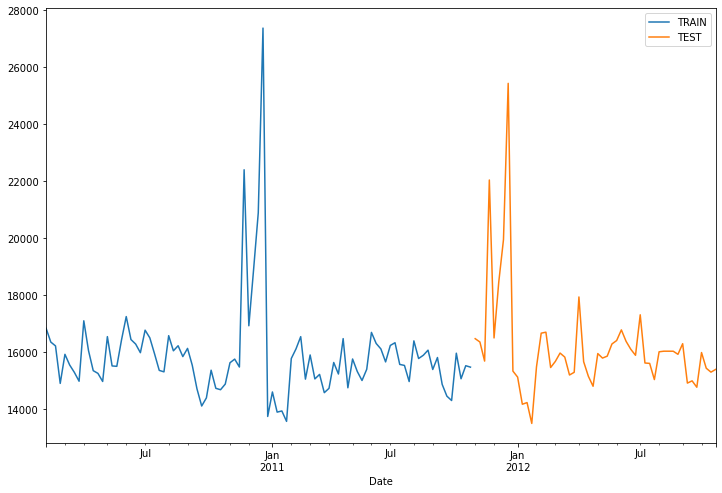

In [16]:
train_data['Weekly_Sales'].plot(legend=True,label='TRAIN')
test_data['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(12,8));

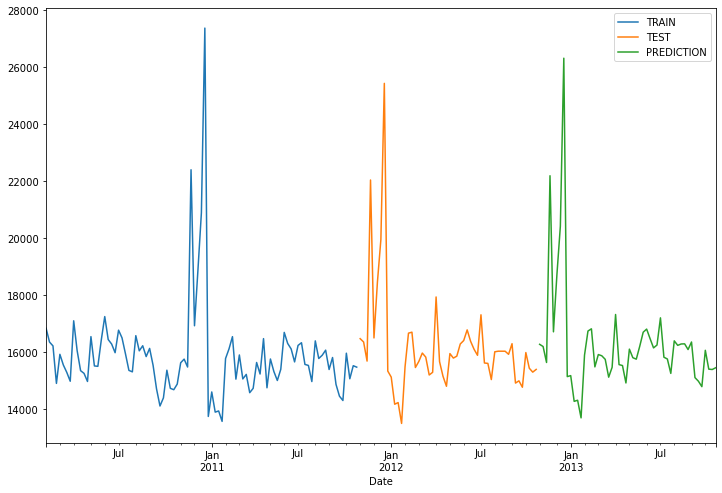

In [17]:
train_data['Weekly_Sales'].plot(legend=True,label='TRAIN')
test_data['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

## Evaluation Metrics

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [19]:
error = mean_squared_error(test_data['Weekly_Sales'], test_predictions)

In [20]:
error

56682.57855007039

In [21]:
rmse(test_data['Weekly_Sales'], test_predictions)

238.0810335790535

## Hodrick-Prescot Filter
    
The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$

$y_t = \tau_t + c_t$

The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


The $\lambda$ value above handles variations in the growth rate of the trend component.<br>When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.

In [22]:

from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(time_series_grouped['Weekly_Sales'], lamb=129600)

In [23]:
time_series_grouped['trend']=gdp_trend

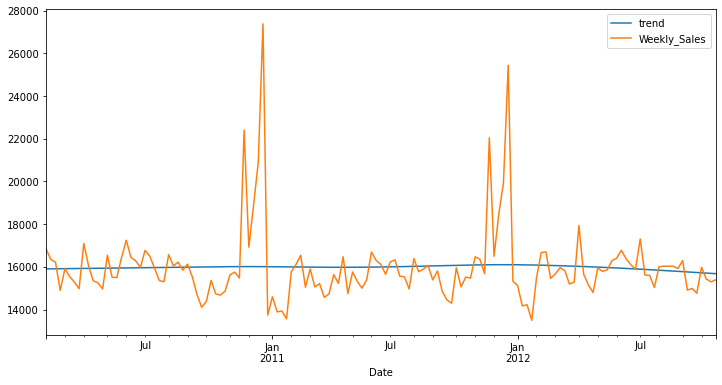

In [24]:
time_series_grouped[['trend','Weekly_Sales']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

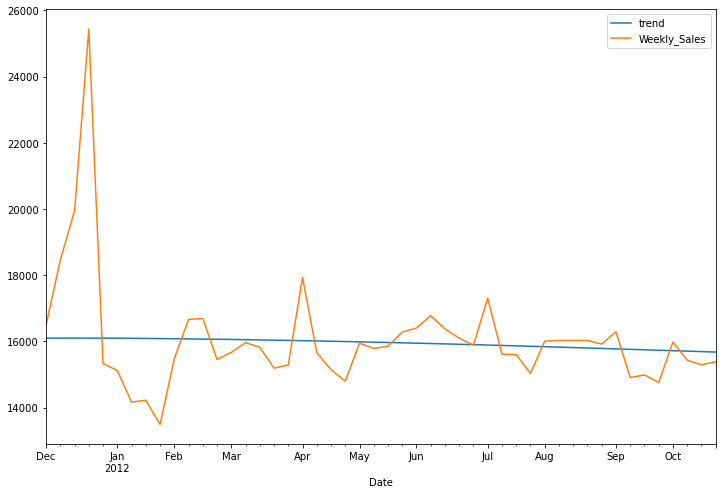

In [25]:
time_series_grouped[['trend','Weekly_Sales']]['2011-12-01':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

The sales tend to peak towards the end of the year because of Thanksgiving and Christmas holidays. The trend is exponential and there is noise in the beginning and end of our dataset. We will use additive model because the trend is linear

## Holt Winters Method

Most recent data will be weighted more than the older data and it will overcome some of the weaknessess from SMA(smaller window will lead to more noise than signal). SMA will lag the data and never allow the data to reach to full peak value due to the averaging, therefore double and triple EWMA will put more weight on values that occurred most recently

In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

time_series_grouped['EWMA12'] = time_series_grouped['Weekly_Sales'].ewm(alpha=alpha,adjust=False).mean()

time_series_grouped.head()

,Weekly_Sales,12-month-SMA,12-month-Std,trend,EWMA12
Date,,,,,
2010-02-05,16836.167844,NaN,NaN,15905.280782,16836.167844
2010-02-12,16352.097463,NaN,NaN,15908.065512,16761.695478
2010-02-19,16216.964169,NaN,NaN,15910.857425,16677.890661
2010-02-26,14900.183209,NaN,NaN,15913.667130,16404.397207
2010-03-05,15921.438573,NaN,NaN,15916.507598,16330.095879


## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

time_series_grouped['DESadd12'] = ExponentialSmoothing(time_series_grouped['Weekly_Sales'], trend='add').fit().fittedvalues.shift(-1)
time_series_grouped.head()

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Weekly_Sales,12-month-SMA,12-month-Std,trend,EWMA12,DESadd12
Date,,,,,,
2010-02-05,16836.167844,NaN,NaN,15905.280782,16836.167844,17045.101409
2010-02-12,16352.097463,NaN,NaN,15908.065512,16761.695478,16838.826075
2010-02-19,16216.964169,NaN,NaN,15910.857425,16677.890661,16656.967008
2010-02-26,14900.183209,NaN,NaN,15913.667130,16404.397207,15900.629085
2010-03-05,15921.438573,NaN,NaN,15916.507598,16330.095879,16000.823986


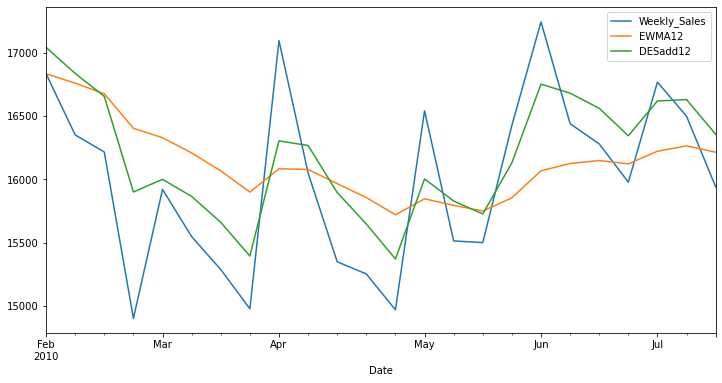

In [28]:
time_series_grouped[['Weekly_Sales','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.<br>
Let's see if using a additive seasonal adjustment helps.

## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 

In [29]:
time_series_grouped['TESadd12'] = ExponentialSmoothing(time_series_grouped['Weekly_Sales'],trend='add',seasonal='add',seasonal_periods=48).fit().fittedvalues
time_series_grouped.head()

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Weekly_Sales,12-month-SMA,12-month-Std,trend,EWMA12,DESadd12,TESadd12
Date,,,,,,,
2010-02-05,16836.167844,NaN,NaN,15905.280782,16836.167844,17045.101409,16822.732253
2010-02-12,16352.097463,NaN,NaN,15908.065512,16761.695478,16838.826075,16333.370022
2010-02-19,16216.964169,NaN,NaN,15910.857425,16677.890661,16656.967008,16196.153253
2010-02-26,14900.183209,NaN,NaN,15913.667130,16404.397207,15900.629085,14878.552814
2010-03-05,15921.438573,NaN,NaN,15916.507598,16330.095879,16000.823986,15899.486673


In [30]:
time_series_grouped['TESmul12'] = ExponentialSmoothing(time_series_grouped['Weekly_Sales'],trend='mul',seasonal='mul',seasonal_periods=52).fit().fittedvalues
time_series_grouped.head()

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Weekly_Sales,12-month-SMA,12-month-Std,trend,EWMA12,DESadd12,TESadd12,TESmul12
Date,,,,,,,,
2010-02-05,16836.167844,NaN,NaN,15905.280782,16836.167844,17045.101409,16822.732253,19838.507539
2010-02-12,16352.097463,NaN,NaN,15908.065512,16761.695478,16838.826075,16333.370022,22565.453589
2010-02-19,16216.964169,NaN,NaN,15910.857425,16677.890661,16656.967008,16196.153253,26089.563510
2010-02-26,14900.183209,NaN,NaN,15913.667130,16404.397207,15900.629085,14878.552814,27809.919477
2010-03-05,15921.438573,NaN,NaN,15916.507598,16330.095879,16000.823986,15899.486673,34347.554831


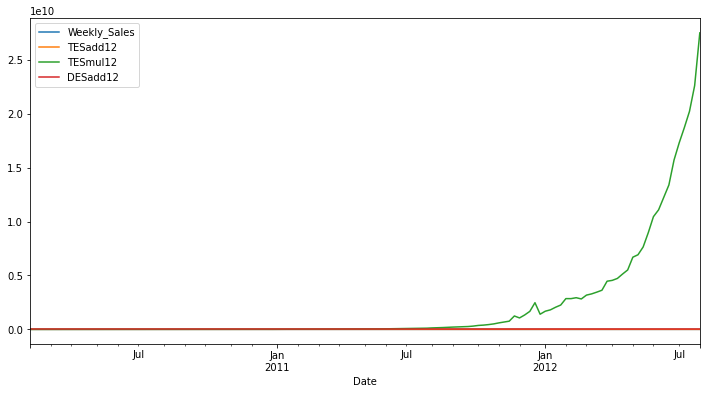

In [31]:
time_series_grouped[['Weekly_Sales','TESadd12','TESmul12', 'DESadd12']].iloc[:-12].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [32]:
df_wal.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Holiday', 'Temperature(C)',
       'Fuel_Price($USD/L)', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size',
       'Super_Bowl', 'LaborsDay', 'Thanksgiving', 'Christmas', 'Easter',
       'IsHoliday', 'week', 'year', 'month', 'quater'],
      dtype='object')

In [33]:
## Dropping Fuel_price and markdown4
df_wal.drop(columns=['MarkDown4','quater','month'],inplace=True)

Observations:

MarkDown1 and MarkDown4 are corelated therefore Markdown 4 was dropped to avoid multicollinearity.Week is strongly co-related with month and quater so let's drop column quater and month.

## Label encoding Categorical features

In [34]:
df_wal['IsHoliday'] = df_wal['IsHoliday'].map({True:1,False:0})
df_wal['Type'] = df_wal['Type'].map({'A':1,"B":2,"C":3}) 

In [35]:
df_wal.head(2)

,Store,Dept,Weekly_Sales,Holiday,Temperature(C),Fuel_Price($USD/L),MarkDown1,MarkDown2,MarkDown3,MarkDown5,...,Type,Size,Super_Bowl,LaborsDay,Thanksgiving,Christmas,Easter,IsHoliday,week,year
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,No_Holiday,42.31,2.572,8536.592778,3346.401918,1670.797978,4428.307667,...,1,151315,False,False,False,False,False,0,5,2010
2010-02-05,1,2,50605.27,No_Holiday,42.31,2.572,8536.592778,3346.401918,1670.797978,4428.307667,...,1,151315,False,False,False,False,False,0,5,2010


## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [36]:
train = time_series_grouped.iloc[:91]
test = time_series_grouped.iloc[91:]

In [37]:
model = AR(train['Weekly_Sales'])

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, F

In [38]:
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.70648D+00    |proj g|=  1.31161D-02

At iterate    1    f=  8.70648D+00    |proj g|=  6.44480D-03

At iterate    2    f=  8.70633D+00    |proj g|=  5.10454D-03

At iterate    3    f=  8.70622D+00    |proj g|=  1.12406D-02

At iterate    4    f=  8.70622D+00    |proj g|=  9.64917D-04

At iterate    5    f=  8.70622D+00    |proj g|=  2.45066D-03

At iterate    6    f=  8.70622D+00    |proj g|=  5.37490D-03

At iterate    7    f=  8.70621D+00    |proj g|=  6.29630D-03

At iterate    8    f=  8.70621D+00    |proj g|=  4.11795D-03

At iterate    9    f=  8.70621D+00    |proj g|=  1.28662D-03

At iterate   10    f=  8.70621D+00    |proj g|=  1.08979D-03

At iterate   11    f=  8.70621D+00    |proj g|=  1.69429D-03

At iterate   12    f=  8.70621D+00    |proj g|=  2.92069D-03

At iterate   13    f=  8.7

 This problem is unconstrained.
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

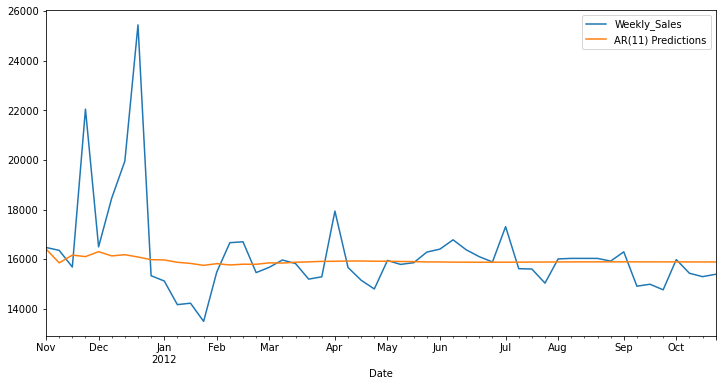

In [40]:
test['Weekly_Sales'].plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [41]:
from sklearn.metrics import mean_squared_error

labels = ['AR(11)']
preds = [predictions11]  # these are variables, not strings!

for i in range(1):
    error = mean_squared_error(test['Weekly_Sales'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(11) Error: 3306042.075


In [42]:
rmse(test['Weekly_Sales'], predictions11)

1818.2524782843893

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.72290D+00    |proj g|=  1.41709D-02

At iterate    1    f=  8.72290D+00    |proj g|=  4.02611D-03

At iterate    2    f=  8.72288D+00    |proj g|=  4.28031D-03

At iterate    3    f=  8.72280D+00    |proj g|=  5.03260D-03

At iterate    4    f=  8.72279D+00    |proj g|=  1.30047D-03

At iterate    5    f=  8.72279D+00    |proj g|=  2.25562D-03

At iterate    6    f=  8.72279D+00    |proj g|=  1.27258D-03

At iterate    7    f=  8.72279D+00    |proj g|=  2.37836D-03

At iterate    8    f=  8.72279D+00    |proj g|=  3.56000D-03

At iterate    9    f=  8.72279D+00    |proj g|=  5.62324D-03

At iterate   10    f=  8.72279D+00    |proj g|=  5.55911D-03

At iterate   11    f=  8.72279D+00    |proj g|=  1.50813D-03

At iterate   12    f=  8.72279D+00    |proj g|=  4.61142D-04

At iterate   13    f=  8.7

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, F

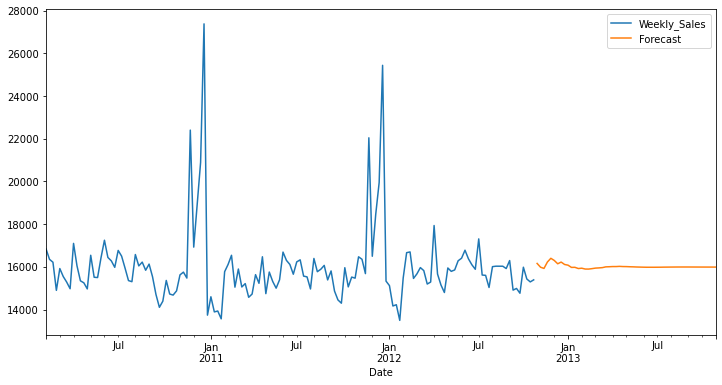

In [43]:
# First, retrain the model on the full dataset
model = AR(time_series_grouped['Weekly_Sales'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(time_series_grouped), end=len(time_series_grouped)+52, dynamic=False).rename('Forecast')

# Plot the results
time_series_grouped['Weekly_Sales'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.


In [44]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(time_series_grouped['Weekly_Sales'],seasonal=True,m=52).summary()

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,0,2)(2,0,0)[52]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1194.716
Date:                             Tue, 22 Nov 2022   AIC                           2401.432
Time:                                     15:37:19   BIC                           2419.209
Sample:                                          0   HQIC                          2408.656
                                             - 143                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9995      0.002   1203.584      0.000       1.996       2.003
ar.L2         -0.9996      0.002   -614.641      0.000      -1.003      -0.996
ma.L1         -1.8778      0.039    -48.556      0.000      -1.954      -1.802
ma.L2          0.8814      0.034     26.095      0.000       0.815       0.948
ar.S.L52       0.9508      0.005    195.150      0.000       0.941       0.960
sigma2      4.576e+05   8.83e-08   5.18e+12      0.000    4.58e+05    4.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.69   Jarque-Bera (JB):               196.36
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.89
Prob(H) (two-sided):                  0.60   Kurtosis:                         8.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.29e+27. Standard errors may be unstable.
"""

In [45]:
model_sarima = SARIMAX(train['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,1,52))
results = model_sarima.fit()
results.summary()

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07684D+01    |proj g|=  8.31594D+01

At iterate    5    f=  8.99440D+00    |proj g|=  1.42376D-01

At iterate   10    f=  8.85620D+00    |proj g|=  9.62607D-03

At iterate   15    f=  8.85431D+00    |proj g|=  1.37431D-03

At iterate   20    f=  8.85419D+00    |proj g|=  1.99455D-03

At iterate   25    f=  8.85411D+00    |proj g|=  2.21771D-04

At iterate   30    f=  8.85362D+00    |proj g|=  3.64963D-03

At iterate   35    f=  8.84182D+00    |proj g|=  1.35196D-01

At iterate   40    f=  8.59924D+00    |proj g|=  9.52569D-02

At iterate   45    f=  8.56714D+00    |proj g|=  1.14953D-02


/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.55267D+00    |proj g|=  3.63524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   3.635D-03   8.553D+00
  F =   8.5526746214431881     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         Weekly_Sales   No. Observations:                   91
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 52)   Log Likelihood                -778.293
Date:                              Tue, 22 Nov 2022   AIC                           1570.587
Time:                                      15:37:22   BIC                           1588.163
Sample:                                  02-05-2010   HQIC                          1577.678
                                       - 10-28-2011                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4468      0.378      3.825      0.000       0.705       2.188
ar.L2         -0.4470      0.378     -1.182      0.237      -1.188       0.294
ma.L1         -1.1278      0.459     -2.458      0.014      -2.027      -0.229
ma.L2          0.1445      0.428      0.338      0.736      -0.694       0.983
ar.S.L52       0.9259      0.018     52.645      0.000       0.891       0.960
ma.S.L52       0.6863      0.175      3.919      0.000       0.343       1.030
sigma2      2.282e+05   8.43e-07   2.71e+11      0.000    2.28e+05    2.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               163.54
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.69   Skew:                             0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.93e+27. Standard errors may be unstable.
"""

In [46]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,0,2)(1,0,1,52) Predictions')

In [47]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Weekly_Sales'][i]}")

predicted=15748.70996, expected=16471.180707515236
predicted=15731.18985, expected=16354.344645748988
predicted=15401.44789, expected=15683.685390070921
predicted=22034.99087, expected=22043.63980470043
predicted=16753.55812, expected=16496.529706078825
predicted=18630.87668, expected=18458.989279069767
predicted=20559.77085, expected=19949.1112749004
predicted=26794.27008, expected=25437.652319127847
predicted=13674.91387, expected=15332.767535797535
predicted=14495.53278, expected=15121.347591658257
predicted=13800.89958, expected=14168.413186109237
predicted=13810.28316, expected=14226.528167680866
predicted=13391.38678, expected=13494.280877371273
predicted=15231.66813, expected=15480.621367148136
predicted=15926.10045, expected=16664.51069643452
predicted=16589.8636 , expected=16699.043739188288
predicted=15100.89457, expected=15458.2504964539
predicted=15823.64737, expected=15672.689929765886
predicted=14815.19779, expected=15965.930729657028
predicted=15157.03883, expected=15824

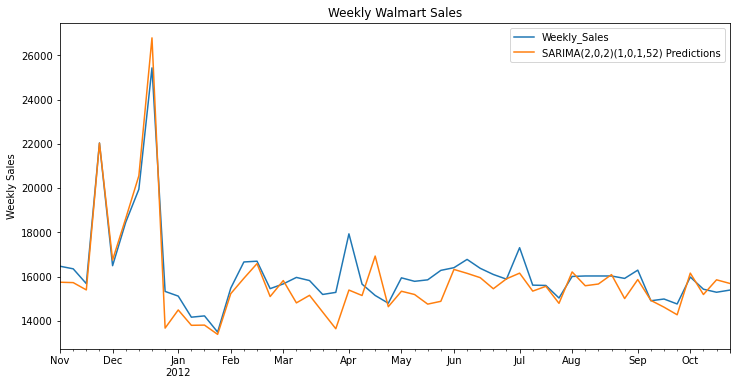

In [48]:
# Plot predictions against known values
title = 'Weekly Walmart Sales'
ylabel='Weekly Sales'
xlabel=''

ax = test['Weekly_Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Evaluate the Model

In [49]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Weekly_Sales'], predictions)
print(f'SARIMA(2,0,2)(1,0,1,52) MSE Error: {error:11.10}')

SARIMA(2,0,2)(1,0,1,52) MSE Error: 599003.3944


In [50]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Weekly_Sales'], predictions)
print(f'SARIMA(2,0,2)(1,0,1,52) RMSE Error: {error:11.10}')

SARIMA(2,0,2)(1,0,1,52) RMSE Error: 773.9530957


These are outstanding results!
### Retrain the model on the full data, and forecast the future

In [51]:
model = SARIMAX(time_series_grouped['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,1,52))
results = model_sarima.fit()
fcast = results.predict(len(time_series_grouped),len(time_series_grouped)+52,typ='levels').rename('SARIMA(2,0,2)(1,0,1,52) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07684D+01    |proj g|=  8.31594D+01


/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  warnings.warn('No frequency information was'
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


At iterate    5    f=  8.99440D+00    |proj g|=  1.42376D-01

At iterate   10    f=  8.85620D+00    |proj g|=  9.62607D-03

At iterate   15    f=  8.85431D+00    |proj g|=  1.37431D-03

At iterate   20    f=  8.85419D+00    |proj g|=  1.99455D-03

At iterate   25    f=  8.85411D+00    |proj g|=  2.21771D-04

At iterate   30    f=  8.85362D+00    |proj g|=  3.64963D-03

At iterate   35    f=  8.84182D+00    |proj g|=  1.35196D-01

At iterate   40    f=  8.59924D+00    |proj g|=  9.52569D-02

At iterate   45    f=  8.56714D+00    |proj g|=  1.14953D-02

At iterate   50    f=  8.55267D+00    |proj g|=  3.63524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


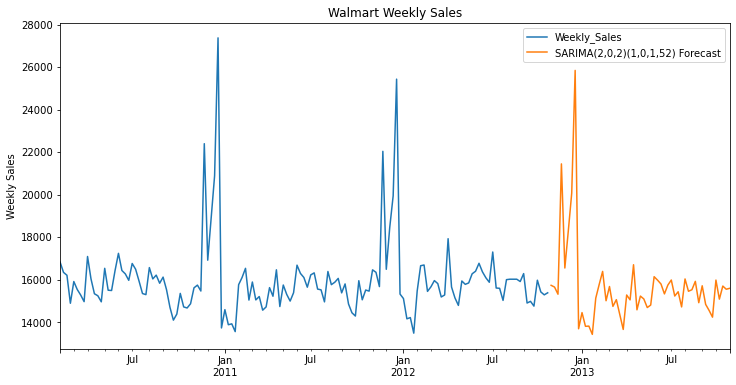

In [52]:
# Plot predictions against known values
title = 'Walmart Weekly Sales'
ylabel='Weekly Sales'
xlabel=''

ax = time_series_grouped['Weekly_Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);